In [323]:
%matplotlib notebook

import matplotlib.pyplot as plt
import skimage
import skimage.io
import skimage.feature
import skimage.segmentation
import skimage.filters
import skimage.transform
import scipy
import numpy as np
import sklearn
import sklearn.preprocessing
import itertools as it
import PIL

from pydash import py_

from cad.metrics import geometry, exposure

In [352]:
img = skimage.io.imread('/d/blimp/f1.jpg')
eim = exposure.equalize(img)

/Users/prashantsinha/.virtualenvs/blimp/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint16
  "%s to %s" % (dtypeobj_in, dtypeobj))


In [353]:
se = skimage.morphology.rectangle(1, 30)
e2m = skimage.transform.rotate(eim.copy(), 0, cval=1)

v_f = skimage.filters.gaussian(e2m, sigma=(50, 0), mode='reflect')

h_f = skimage.filters.gaussian(e2m, sigma=(0, 50), mode='reflect')


v_m = skimage.morphology.erosion(v_f, skimage.morphology.rectangle(50, 1))
h_m = skimage.morphology.erosion(h_f, skimage.morphology.rectangle(1, 50))

plt.imshow(v_m, cmap=plt.cm.bone)

<IPython.core.display.Javascript object>


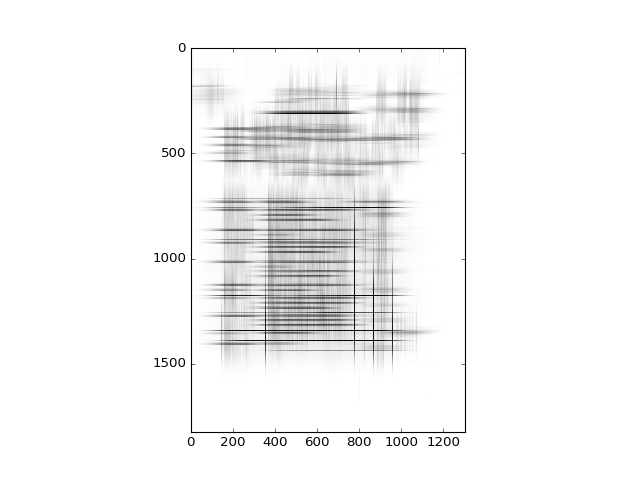

In [355]:
# plt.imshow(1 - h_m * v_m, cmap=plt.cm.bone)
# plt.imshow(1 - ((1 - h_m)*(1 - v_m)), cmap=plt.cm.bone)

normalize = lambda x: (lambda m: m / m.max())(x - x.min())

vn_m = normalize(v_m)
hn_m = normalize(h_m)

cmps = vn_m * hn_m

plt.imshow(cmps, cmap=plt.cm.gray)